In [1]:
#!nvidia-smi

# **Mounting Drive And Reading Image Folders**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import os

In [ ]:
data_dir = "/content/drive/MyDrive/SampleMaizeD"

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

Healthy
MLB
MSV


In [ ]:
Batch_Size = 32
Image_Size = 224
Channels=3

# **Loading The Dataset Into The Keras API Pipeline**

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 3000 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Healthy', 'MLB', 'MSV']

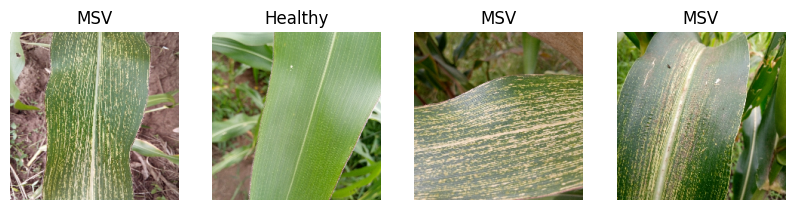

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(4):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

**Spliting the Dataset Into Train, Test and Validation**

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

19

In [ ]:
len(val_ds)

2

In [ ]:
len(test_ds)

3

**Cache, Shuffle, and Prefetch the Dataset**

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**Resizing And Rescaling**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

# **Model Building And Training**

**Model**

In [ ]:
input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dense(512),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (128, 224, 224, 3)        0         
                                                                 
 conv2d (Conv2D)             (128, 222, 222, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (128, 111, 111, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (128, 109, 109, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (128, 54, 54, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (128, 52, 52, 64)        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.optimizer.lr=0.001

In [ ]:
#Early_stop= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
epoch = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epoch,
    verbose = 1,
    #callbacks=[Early_stop]
)

Epoch 1/100
19/19 [==============================] - 398s 5s/step - loss: 1.0255 - accuracy: 0.4445 - val_loss: 0.9908 - val_accuracy: 0.4565
Epoch 2/100
19/19 [==============================] - 6s 297ms/step - loss: 0.8147 - accuracy: 0.5958 - val_loss: 0.8440 - val_accuracy: 0.5978
Epoch 3/100
19/19 [==============================] - 6s 300ms/step - loss: 0.6689 - accuracy: 0.6822 - val_loss: 0.6964 - val_accuracy: 0.6848
Epoch 4/100
19/19 [==============================] - 6s 295ms/step - loss: 0.5344 - accuracy: 0.7837 - val_loss: 0.5402 - val_accuracy: 0.7609
Epoch 5/100
19/19 [==============================] - 6s 295ms/step - loss: 0.4965 - accuracy: 0.7973 - val_loss: 0.4451 - val_accuracy: 0.8261
Epoch 6/100
19/19 [==============================] - 6s 298ms/step - loss: 0.4067 - accuracy: 0.8396 - val_loss: 0.4207 - val_accuracy: 0.8207
Epoch 7/100
19/19 [==============================] - 6s 301ms/step - loss: 0.2817 - accuracy: 0.8943 - val_loss: 0.4224 - val_accuracy: 0.8207


# **Model Testing And Evaluation**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

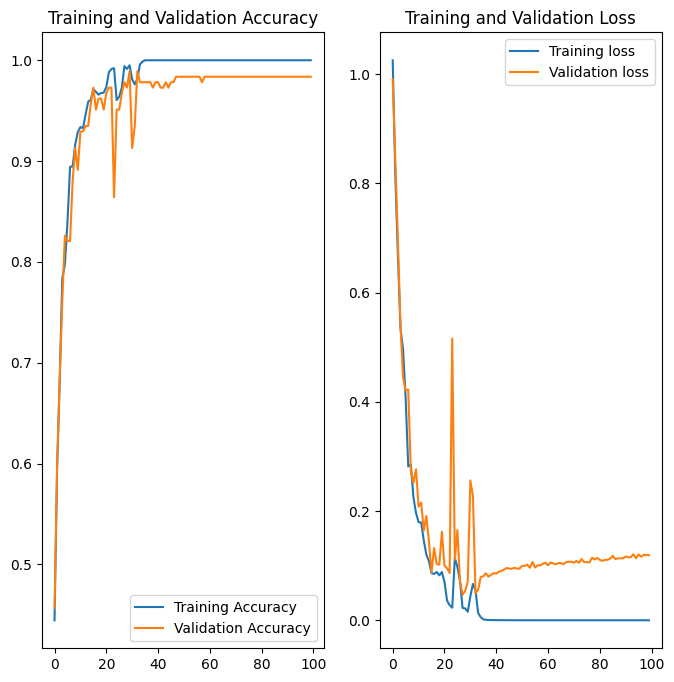

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(epoch), acc, label = 'Training Accuracy')
plt.plot(range(epoch), val_acc, label = 'Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epoch), loss, label = 'Training loss')
plt.plot(range(epoch), val_loss, label = 'Validation loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 54s 83ms/step - loss: 0.1568 - accuracy: 0.9870


first image to predict
actual label: Healthy
4/4 [==============================] - 1s 14ms/step
[1.0000000e+00 1.1640023e-20 6.8282041e-24]
0
predicted label: Healthy


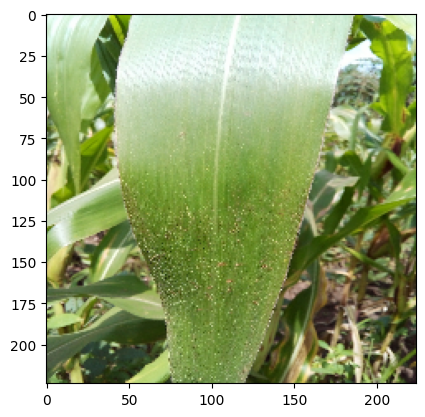

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


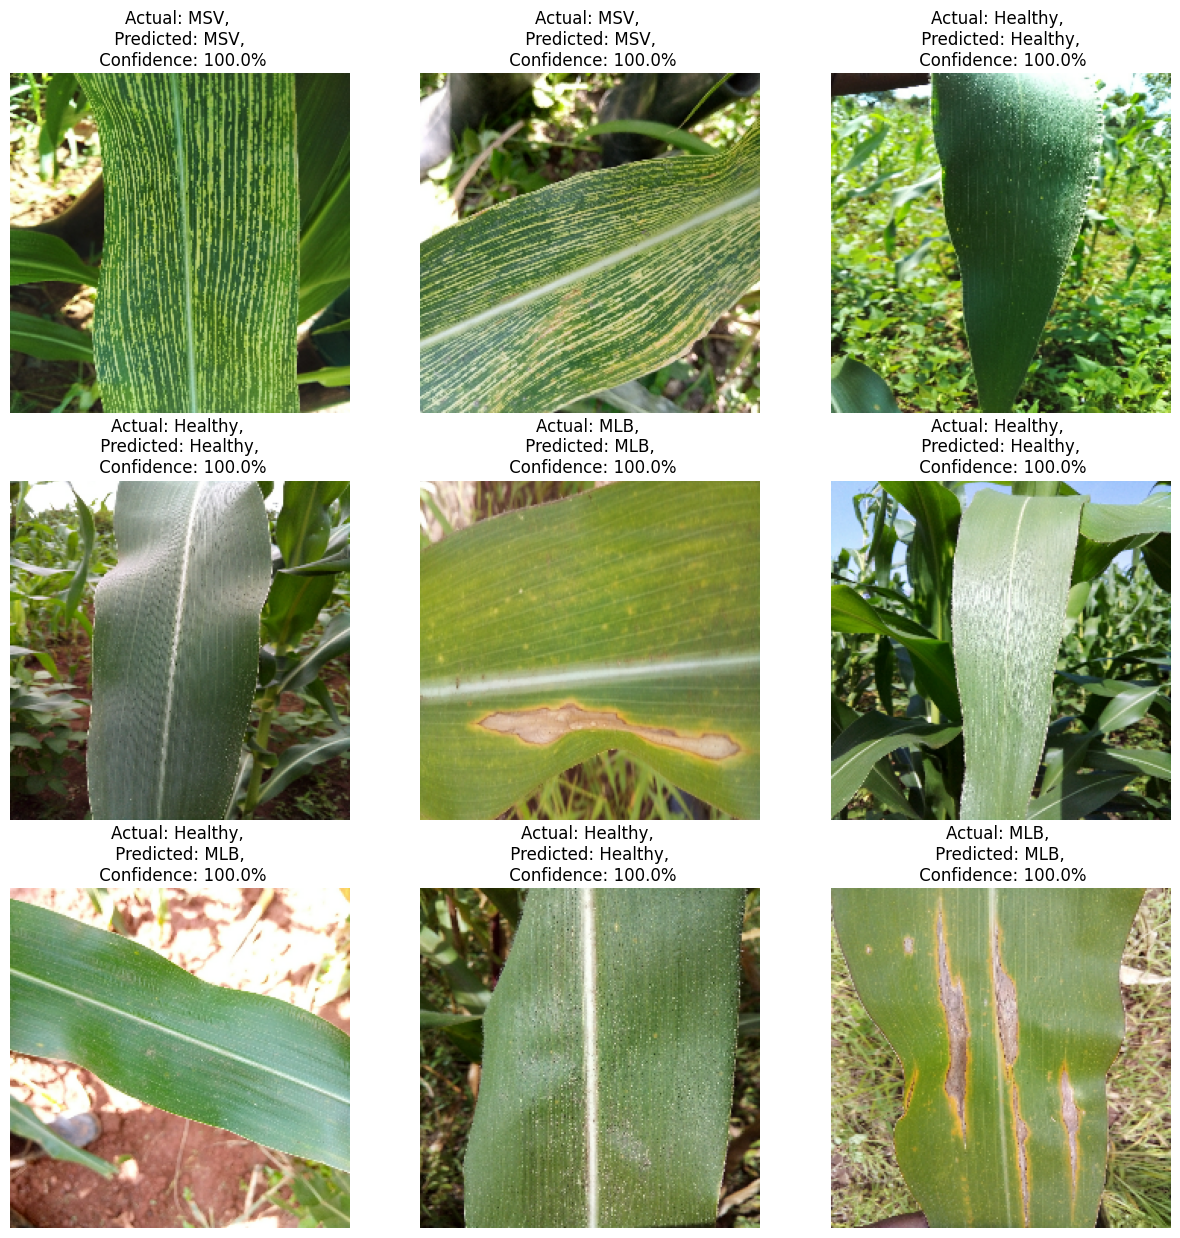

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as pyplot

In [ ]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=pyplot.cm.Blues
):

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, "{:0.2f}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

In [ ]:
target_names = ["Healthy", "MLB", "MSV"]

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

4/4 [==============================] - 0s 20ms/step


In [ ]:
print("Confusion Matrix")
conf_matrix = confusion_matrix(correct_labels, predicted_labels)
print(conf_matrix)

Confusion Matrix
[[120   1   0]
 [  0 138   0]
 [  4   0 121]]


Confusion matrix, without normalization
[[120   1   0]
 [  0 138   0]
 [  4   0 121]]


<function matplotlib.pyplot.show(close=None, block=None)>

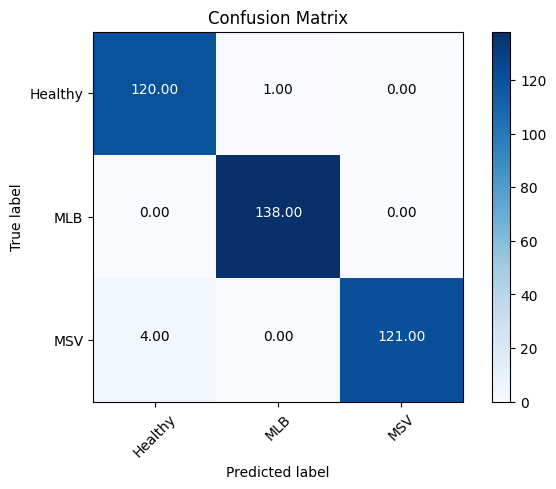

In [ ]:
pyplot.figure(1)
plot_confusion_matrix(conf_matrix, classes=target_names, normalize=False, title="Confusion Matrix")
pyplot.show

In [ ]:
print(classification_report(correct_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.97      0.99      0.98       121
         MLB       0.99      1.00      1.00       138
         MSV       1.00      0.97      0.98       125

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384



In [ ]:
#model.save('/content/drive/MyDrive/Models/model.customfyp.h5') # Saves the entire model to a single artifact

In [ ]:
'''converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite","wb") as f:
  f.write(tflite_model)'''